# Data Collection & Exploratory

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Combined_Jobs_Final.csv')

In [3]:
df.head(5)

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [4]:
df = df[['Status', 'Title', 'Position', 'Company', 'Job.Description']]
print(len(df))

84090


In [5]:
df.head(5)

,Status,Title,Position,Company,Job.Description
0,open,Server @ Tacolicious,Server,Tacolicious,Tacolicious' first Palo Alto store just opened...
1,open,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,\r\n\r\nNew French Brasserie in S.F. Financia...
2,open,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,We are a popular Mediterranean wine bar and re...
3,open,Server @ Teriyaki House,Server,Teriyaki House,● Serve food/drinks to customers in a profess...
4,open,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,"Located at the heart of Hollywood, we are one ..."


In [6]:
df['Title'][5]

'Receptionist @ Mind of Beauty Day Spa'

In [7]:
df['Job.Description'][5]

'We are a group of professional massage therapists. We are currently looking for a receptionist who can speak both Mandarin and English fluently. Please apply if you are interested! \r\n\r\n● Act as a receptionist\r\n● Support the staff when needed \r\n'

In [8]:
df.isnull().sum()
df.fillna('',inplace=True)
df.isnull().sum()

Status             0
Title              0
Position           0
Company            0
Job.Description    0
dtype: int64

In [9]:
df = df.sample(n=1000,random_state=42)

In [10]:
df.shape

(1000, 5)

# Data Cleaning & Pre-processing

In [11]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
# nltk.download('punkt') # For Jupyter Notebook only
# nltk.download('stopwords') # For Jupyter Notebook only

In [12]:
ps = PorterStemmer()

In [13]:
def cleaning(input):
    cleaned = re.sub(r'[^a-zA-Z0-9\s]','',input)
    # tokens = nltk.word_tokenize(cleaned.lower())
    # stemming = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    
    return "".join(cleaned)

In [14]:
cleaned = cleaning("lunged where is the maddening recommendation at? \n\r &%$@%& @grooving")

In [15]:
print(cleaned)

lunged where is the maddening recommendation at 
  grooving


In [16]:
# ETA 30 seconds
df['Title'] = df['Title'].astype(str).apply(lambda x:cleaning(x))
df['Job.Description'] = df['Job.Description'].astype(str).apply(lambda x:cleaning(x))
df['Position'] = df['Position'].astype(str).apply(lambda x: cleaning(x))

In [17]:
df['Details'] = df['Job.Description']+" "+df['Title']+df['Position']

In [18]:
df.head(10)

,Status,Title,Position,Company,Job.Description,Details
64119,open,Site Director Knowledge Universe,Site Director,Knowledge Universe,Job Summary Knowledge Universe KU Site Directo...,Job Summary Knowledge Universe KU Site Directo...
35827,open,Administrative Assistant OfficeTeam,Administrative Assistant,OfficeTeam,Ref ID 03110118480Classification SecretaryAdmi...,Ref ID 03110118480Classification SecretaryAdmi...
72100,open,Account Manager CHI Payment Systems,Account Manager,CHI Payment Systems,If yoursquore energetic motivated hardworking ...,If yoursquore energetic motivated hardworking ...
46355,open,Outside Wholesale Sales Rep PARTTIME River Fr...,Outside Wholesale Sales Rep PARTTIME,River Front Chrysler Jeep Dodge,OUTSIDE WHOLESALE SALES REP\r\n\r\nJob Respons...,OUTSIDE WHOLESALE SALES REP\r\n\r\nJob Respons...
34166,open,Customer Service Rep Help People with Hearing ...,Customer Service Rep Help People with Hearing ...,CaptionCall,CaptionCall Communication Assistant Imagin...,CaptionCall Communication Assistant Imagin...
43584,open,Bookkeeper Accountemps,Bookkeeper,Accountemps,Ref ID00900140759ClassificationBookkeeperCompe...,Ref ID00900140759ClassificationBookkeeperCompe...
78169,open,Nuclear Medicine Tech PRN HCAEast Florida,Nuclear Medicine Tech PRN,HCA-East Florida,Job DescriptionNuclear Medicine Tech PRNJob Nu...,Job DescriptionNuclear Medicine Tech PRNJob Nu...
2211,open,Construction Project Admin Needed ASAP Office...,Construction Project Admin Needed ASAP,OfficeTeam,Ref ID 001609715006Classification OfficeAdmini...,Ref ID 001609715006Classification OfficeAdmini...
6936,open,Accounting Clerk Accountemps,Accounting Clerk,Accountemps,Ref ID03410110048ClassificationAccounting Cler...,Ref ID03410110048ClassificationAccounting Cler...
7478,open,CASHIER Murphy USA,CASHIER,Murphy USA,When is a job more than just a jobWhen you kno...,When is a job more than just a jobWhen you kno...


In [19]:
df['Details'][7478]

'When is a job more than just a jobWhen you know that you are making a difference in the lives of those around youWhen you go to work every day looking forward to the day ahead of youWhen the decisions you make on the job really matter to those whom you serve Cashier Whether your goal is to begin a fantastic fulltime career or have a great parttime job your talents will be valued and respected at Murphy USA  To be successful as a cashier you need energy an excellent work ethic a great attitude and a smile You will be the face of our company and deliver the legendary customer service that Murphy USA and our associates are known for providing Your responsibilities will includeProviding a prompt efficient and courteous customer experienceResponding and resolving customers requests and concernsAssisting customers with purchases and fuel transactionsOperating cash registerRestocking merchandisePerforming job related duties as assignedA job is more than just a job when its a career at Murphy

# Model Training

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
tfif = TfidfVectorizer(stop_words='english')
matrix = tfif.fit_transform(df['Details'])
similarity = cosine_similarity(matrix)

In [22]:
matrix

<1000x14144 sparse matrix of type '<class 'numpy.float64'>'
	with 104675 stored elements in Compressed Sparse Row format>

In [23]:
similarity[0]

array([1.        , 0.04257474, 0.01675678, 0.01200901, 0.03941838,
       0.00830708, 0.02740878, 0.02772943, 0.00553861, 0.03163516,
       0.0110012 , 0.02277183, 0.01207861, 0.01731069, 0.00415917,
       0.00376161, 0.01966876, 0.03708652, 0.03443471, 0.01790917,
       0.        , 0.01693409, 0.01574226, 0.00379244, 0.03483041,
       0.02841958, 0.03311532, 0.01355785, 0.01331299, 0.03487323,
       0.01402409, 0.04086562, 0.00802472, 0.0166385 , 0.00584479,
       0.03030923, 0.01372913, 0.06597881, 0.11181424, 0.01188198,
       0.03870526, 0.0145428 , 0.00381656, 0.03425482, 0.01628941,
       0.01679738, 0.05734412, 0.01523174, 0.03104918, 0.        ,
       0.00514022, 0.01548367, 0.10326266, 0.01325829, 0.01162116,
       0.00331836, 0.04108788, 0.0583414 , 0.01034879, 0.1327684 ,
       0.0353497 , 0.00885433, 0.02631562, 0.03201319, 0.04230397,
       0.00611262, 0.01555892, 0.02053775, 0.01244076, 0.02243273,
       0.00649587, 0.        , 0.07834376, 0.01325677, 0.02602

In [24]:
sorting = sorted(list(enumerate(similarity[0])), key=lambda x: x[1], reverse=True)[1:20]

In [25]:
print(sorting)

[(276, 0.9734604668946958), (730, 0.45631879168658446), (81, 0.43489753074377974), (917, 0.43489753074377974), (252, 0.22928461723818683), (128, 0.20372303457856225), (629, 0.1891875949368748), (825, 0.14742610075292173), (298, 0.141642433607183), (59, 0.13276840013270513), (360, 0.12628837276828536), (245, 0.1212633608851429), (113, 0.11736292505665025), (38, 0.11181424465688704), (326, 0.10998712115590192), (195, 0.10714810702558314), (284, 0.10663684958487911), (114, 0.1064471529213854), (857, 0.10480625945651803)]


# Scatterplot

In [26]:
import matplotlib.pyplot as plt

In [27]:
# Extract x and y coordinates
x = [cosineSimilarity[1] for cosineSimilarity in sorting]
y = [indexValue[0] for indexValue in sorting]

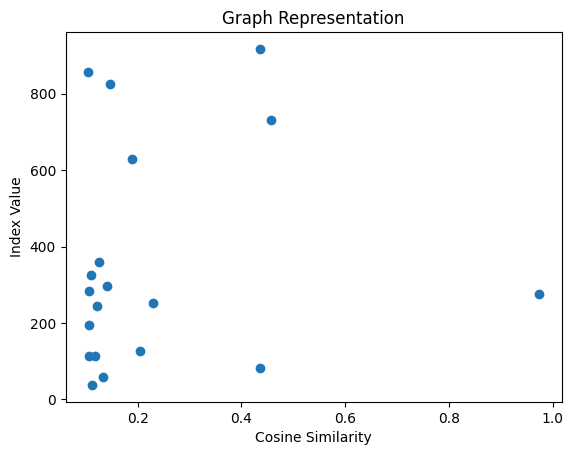

In [28]:
# Adding labels and the title to graph
plt.title('Graph Representation')
plt.xlabel('Cosine Similarity')
plt.ylabel('Index Value')

# Plotting the scatter plot
plt.scatter(x, y)

# Backend Job Recommendation System

In [29]:
def recommendation(title):
    placeIndex = df[df['Title'] == title].index[0]
    placeIndex = df.index.get_loc(placeIndex)
    distances = sorted(list(enumerate(similarity[placeIndex])),key=lambda x: x[1], reverse=True)[0:20]
    
    jobs = []
    for i in distances:
        jobs.append(df.iloc[i[0]].Title)
    return jobs

In [30]:
recommendation("Site Director  Knowledge Universe")

['Site Director  Knowledge Universe',
 'Site Director  Knowledge Universe Education LLC',
 'Teacher  Knowledge Universe',
 'Assistant Teacher  Knowledge Universe',
 'Assistant Teacher  Knowledge Universe',
 'Cook  Knowledge Universe',
 'Immediate Openings For Assistant Teachers  La Petite Academy',
 'Temporary Coordinator Site Operations macyscom  Macys',
 'HVAC Instructor  Vatterott Educational Centers',
 'Security Officer  Regular  Securitas USA',
 'Security Officer  100000 Jobs Coalition  Securitas USA',
 'Summer School Age Assistant  Childrens Courtyard',
 'Medical Office Assistant Instructor  Concorde Career Colleges Inc',
 'Armed Security Officer  Securitas USA',
 'Fellowship Program Coordinator  Connecticut Childrens Medical Center',
 'Patient Serv Rep Onsite I  ES  Firstsource Solutions Ltd',
 'Faculty I  On Call  Zenith Education group',
 'Faculty  IT IT Support Specialist  Zenith Education group',
 'Youth Camp Residential Assistant  Activity Coordinator  New York NY  ELS Educ

In [31]:
import pickle
pickle.dump(df, open("df.pkl", 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))